# Relax Challenge
***

In order to perform EDA on this dataset, I had to create a function that allows you to create labels for defining an 'adopted_user'.

**Interesting findings**
1. Adopted Users accounted for 12% of the dataset
2. Source Creation - Adopted Users were mostly invited by Org_Invite and Guest_Invite
3. Marketing Drip and Mailing List Opt didn't show anything to interesting
4. Majority of the non-adopted users registered from Jan-May

**Most Interesting Finding:**
1. The most interesting finding is that the least amount of registration occurred on May for adopted users, but it's the most registered in non-adopted users.

**Further Investigation:** It would be great if we can have more data about user activity. One EDA that I would like to perform more on is the difference betweeen registrations of adopted vs non-adopted users during the month of May.

Defining an **"adopted user"** as a user who has logged into the product on **three seperate days in at least one seven-day period**, identify which factors predict future user adoption.

**Please send us:**
- a brief writeup of your findings (the more conscise, thebetter -- no more than one page)
- summary tables
- graphs
- code
- queries that can help us understand your approach. 

Please not any factors you considered or investigation you did, even if they did not pan out. Feel free to identify any further research or data you think would be valuable. 

In [1]:
# Import necessary libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline

## Create Active User Function 
***
Apply this function to the dataset to create the 'adopted_user' labels, where an adopted user represents people who logged in at least 3 times within a 7 day period.

In [116]:
def active_users(period, days_logged, user):

    import pandas as pd
    from pandas import DataFrame, Series

    visited = len(user.index) #get the number of times the user logged in
    i, count = 0, 1
    active_user = False

    while count < days_logged:
        if (i+2) < visited: #needs to be at least 3 entries left	
            if (user['time_stamp'].iloc[i + 1] - user['time_stamp'].iloc[i]) <= pd.Timedelta(days=period) and (user['time_stamp'].iloc[i + 1] - user['time_stamp'].iloc[i]) > pd.Timedelta(days=1) :
                count += 1 #logged in twice within a 7 day period
                new_timeframe = pd.Timedelta(days=7) - ((user['time_stamp'].iloc[i + 1] - user['time_stamp'].iloc[i]))
                if (user['time_stamp'].iloc[i + 2] - user['time_stamp'].iloc[i + 1]) <= new_timeframe and (user['time_stamp'].iloc[i + 2] - user['time_stamp'].iloc[i + 1]) > pd.Timedelta(days=1):
                    active_user = True #they logged in three times within a 7 period window
                    count += 1
                else: 
                    i += 1
                    count = 1
            else:
                i += 1
                count = 1
        else:
            count = days_logged
    return active_user

## Load 'takehome_user_engagement.csv'

In [117]:
df_eng = pd.read_csv('takehome_user_engagement.csv')
df_eng.head(5)

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [118]:
df_eng['time_stamp'] = pd.to_datetime(df_eng.time_stamp)

In [119]:
df3 = df_eng.groupby('user_id').filter(lambda x: (len(x) > 2) & (active_users(period=7, days_logged=3, user=x) ==True))

In [123]:
# Now we can create our labels with these unique users that logged in 3 times or more within 7 days
unique_users = df3.user_id.unique()
unique_users

array([    2,    10,    33, ..., 11969, 11975, 11988], dtype=int64)

## Load 'takehome_users.csv'

In [4]:
# Load json file into pandas dataframe
df_user = pd.read_csv('takehome_users.csv', encoding ='latin1')
df_user.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0



## Create "adopted_user" label

**Summary:**
- About 88% of the users are not adopted users
- About 12% of the users are adopted users

In [125]:
df_user['adopted_user'] = df_user.object_id.isin(unique_users)

In [170]:
df_user.adopted_user.value_counts(1)

0    0.875583
1    0.124417
Name: adopted_user, dtype: float64

In [133]:
df_user.dtypes

object_id                       int64
creation_time                  object
name                           object
email                          object
creation_source                object
last_session_creation_time    float64
opted_in_to_mailing_list        int64
enabled_for_marketing_drip      int64
org_id                          int64
invited_by_user_id            float64
adopted_user                     bool
dtype: object

In [171]:
# Convert the boolean label into an int
df_user.adopted_user = df_user.adopted_user.astype(int)

In [139]:
df_user.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0


## Explore Creation Source

**Summary:**
- Majority of the users were invited to an organization as a full member
- Doesn't seem to have any difference between adopted users and non-adopted users

In [175]:
df_user.creation_source.value_counts(1)

ORG_INVITE            0.354500
GUEST_INVITE          0.180250
PERSONAL_PROJECTS     0.175917
SIGNUP                0.173917
SIGNUP_GOOGLE_AUTH    0.115417
Name: creation_source, dtype: float64

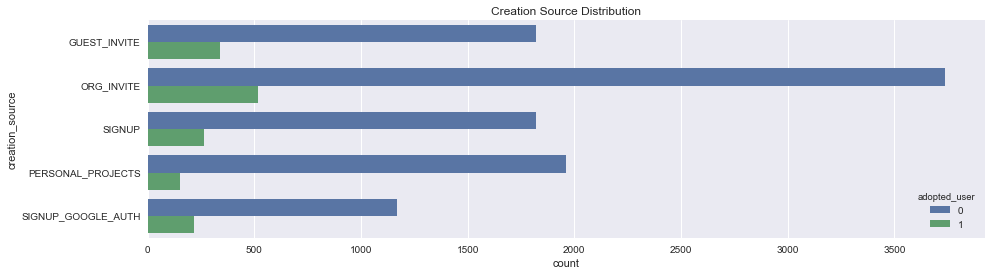

In [173]:
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="creation_source", hue='adopted_user', data=df_user).set_title('Creation Source Distribution');

## Explore Marketing Drip

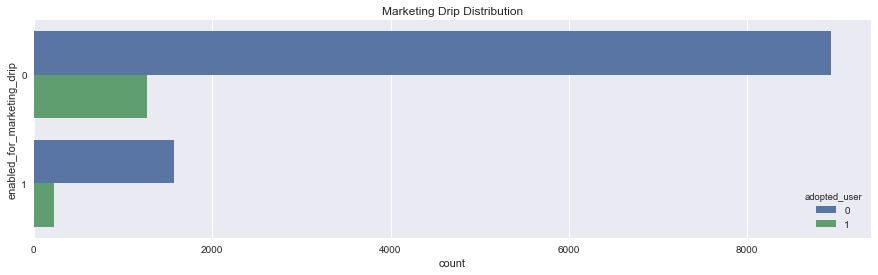

In [177]:
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="enabled_for_marketing_drip", hue='adopted_user', data=df_user).set_title('Marketing Drip Distribution');

## Explore Mailing List Opt

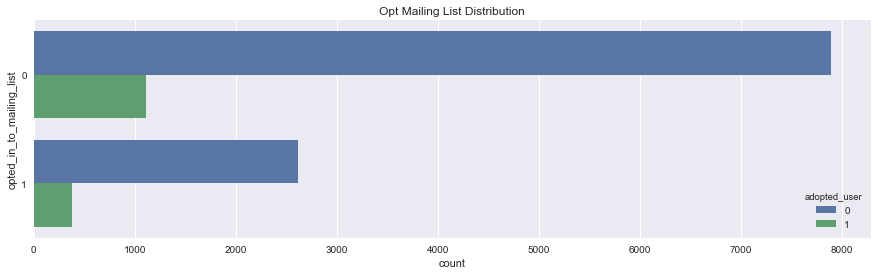

In [176]:
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="opted_in_to_mailing_list", hue='adopted_user', data=df_user).set_title('Opt Mailing List Distribution');

## Create new features (Month and Year)

In [151]:
df_user['creation_time'] = pd.to_datetime(df_user.creation_time)

In [155]:
df_user['year'] = df_user['creation_time'].dt.year
df_user['month'] = df_user['creation_time'].dt.month
df_user['day'] = df_user['creation_time'].dt.day

In [167]:
df_user.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,weekday,year,month,day
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0,1,2014,4,22
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1,4,2013,11,15
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0,1,2013,3,19
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0,1,2013,5,21
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0,3,2013,1,17


## Explore Non-Adopted Users by Month Registration

**Summary:**
- It looks like majority of the non-adopted users registered from Jan-May

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

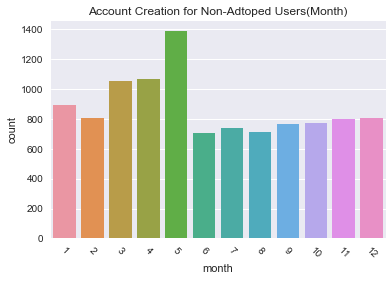

In [169]:
# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='month', data=df_user[df_user['adopted_user']==0]).set_title('Account Creation for Non-Adtoped Users(Month)');
 
# Rotate x-labels
plt.xticks(rotation=-45)

## Explore Adopted Users by Month Registration

**Summary:**
- The most interesting finding is that the least amount of registration occurred on May for adopted users, but it's the most registered in non-adopted users. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

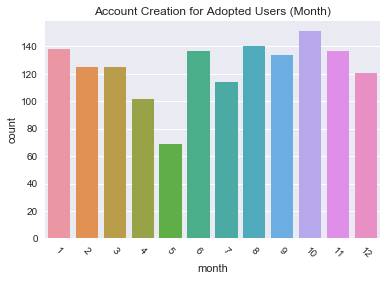

In [168]:
# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='month', data=df_user[df_user['adopted_user']==1]).set_title('Account Creation for Adopted Users (Month)');
 
# Rotate x-labels
plt.xticks(rotation=-45)

## Explore Account Creation by Year

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

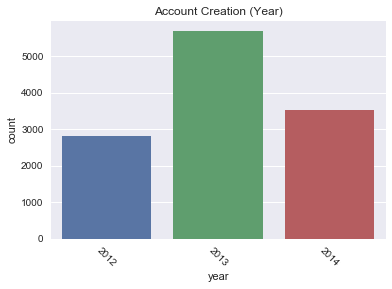

In [166]:
# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='year', data=df_user).set_title('Account Creation (Year)');
 
# Rotate x-labels
plt.xticks(rotation=-45)